# Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image

# Function Library

In [3]:
# Function to add BMI classes
def classify_bmi(bmi):
    if bmi <= 18.5:
        return 'Underweight'
    elif bmi <= 25:
        return 'Normal'
    elif bmi <= 30:
        return 'Overweight'
    elif bmi <= 35:
        return 'Obese 1'
    elif bmi <= 40:
        return 'Obese 2'
    else:
        return 'Obese 3'

# Data Loading

In [4]:
df = pd.read_csv('data/BMI/data.csv', index_col= 0)
df.head()

,bmi,gender,is_training,name
0,34.207396,Male,1,img_0.bmp
1,26.453720,Male,1,img_1.bmp
2,34.967561,Female,1,img_2.bmp
3,22.044766,Female,1,img_3.bmp
4,37.758789,Female,1,img_4.bmp


In [5]:
# Examine dataframe shape
print(f'Dataframe Shape: {df.shape}')

Dataframe Shape: (4206, 4)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4206 entries, 0 to 4205
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bmi          4206 non-null   float64
 1   gender       4206 non-null   object 
 2   is_training  4206 non-null   int64  
 3   name         4206 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 164.3+ KB


In [7]:
df.describe()

,bmi,is_training
count,4206.000000,4206.000000
mean,32.796210,0.800761
std,8.299130,0.399476
min,17.716216,0.000000
25%,26.541837,1.000000
50%,31.323409,1.000000
75%,37.577261,1.000000
max,85.987061,1.000000


# Exploratory Data Analysis

In [8]:
df.isna().sum()

bmi            0
gender         0
is_training    0
name           0
dtype: int64

In [9]:
df['name'].duplicated().sum()

0

In [10]:
missing_imgs = []
for name in df['name']:
    try:
        img = Image.open(os.path.join('data/BMI/Images', name))
        img.verify()  # confirms it's a readable image
    except:
        missing_imgs.append(name)

print(f"{len(missing_imgs)} images failed to load")

244 images failed to load


In [11]:
print(missing_imgs[:10])

['img_4.bmp', 'img_5.bmp', 'img_40.bmp', 'img_86.bmp', 'img_93.bmp', 'img_112.bmp', 'img_113.bmp', 'img_238.bmp', 'img_239.bmp', 'img_300.bmp']


In [12]:
df_clean = df[~df['name'].isin(missing_imgs)].reset_index(drop= True)

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3962 entries, 0 to 3961
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bmi          3962 non-null   float64
 1   gender       3962 non-null   object 
 2   is_training  3962 non-null   int64  
 3   name         3962 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 123.9+ KB


In [14]:
df_clean.to_csv('data/BMI/cleaned_data.csv', index=False)

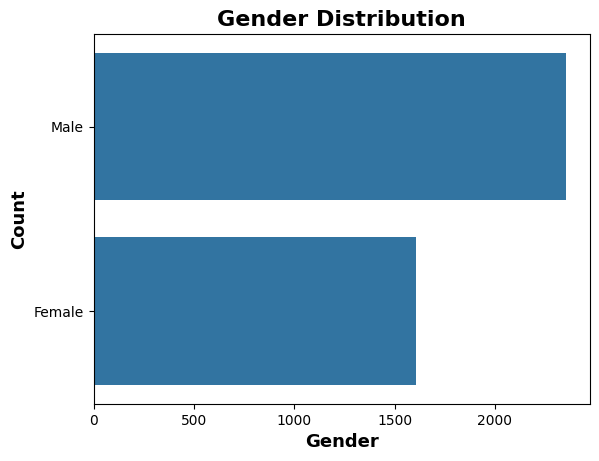

In [15]:
# plt.Figure(figsize= (16, 4))
sns.countplot(y= 'gender', data= df_clean)
plt.xlabel('Gender', fontsize= 13, fontweight= 'bold')
plt.ylabel('Count', fontsize= 13, fontweight= 'bold')
plt.title('Gender Distribution', fontsize= 16, fontweight= 'bold')
plt.show()

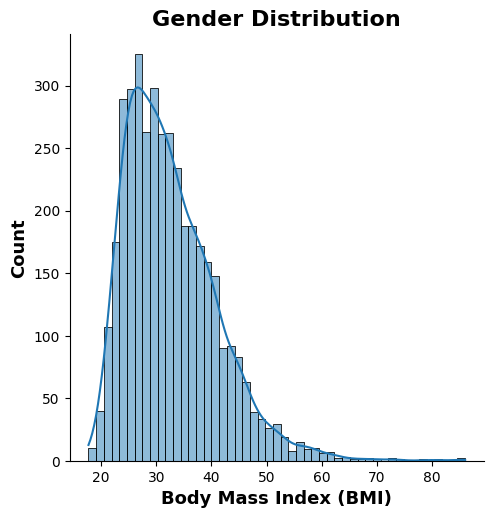

In [16]:
sns.displot(df_clean['bmi'], kde= True)
plt.xlabel('Body Mass Index (BMI)', fontsize= 13, fontweight= 'bold')
plt.ylabel('Count', fontsize= 13, fontweight= 'bold')
plt.title('Gender Distribution', fontsize= 16, fontweight= 'bold')
plt.show()

In [17]:
df_clean['bmi_class'] = df_clean['bmi'].apply(classify_bmi)

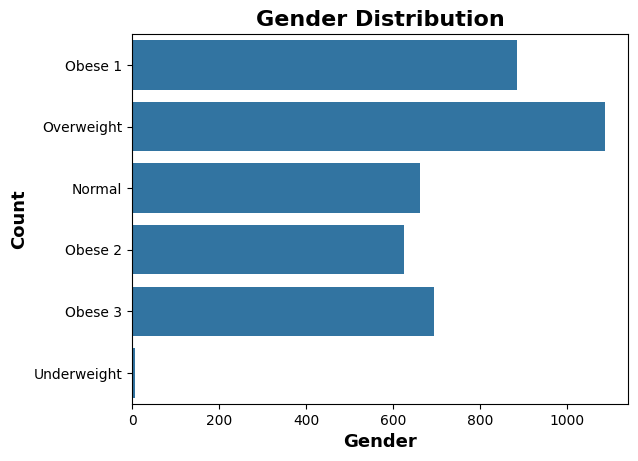

In [18]:
sns.countplot(y= 'bmi_class', data= df_clean)
plt.xlabel('Gender', fontsize= 13, fontweight= 'bold')
plt.ylabel('Count', fontsize= 13, fontweight= 'bold')
plt.title('Gender Distribution', fontsize= 16, fontweight= 'bold')
plt.show()

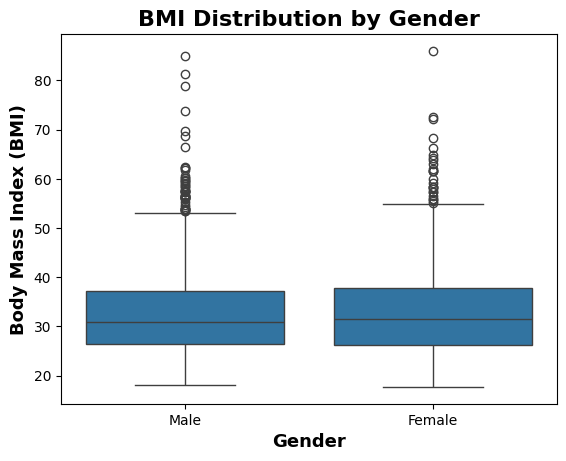

In [19]:
sns.boxplot(x= 'gender', y= 'bmi', data= df_clean)
plt.xlabel('Gender', fontsize= 13, fontweight= 'bold')
plt.ylabel('Body Mass Index (BMI)', fontsize= 13, fontweight= 'bold')
plt.title('BMI Distribution by Gender', fontsize= 16, fontweight= 'bold')
plt.show()

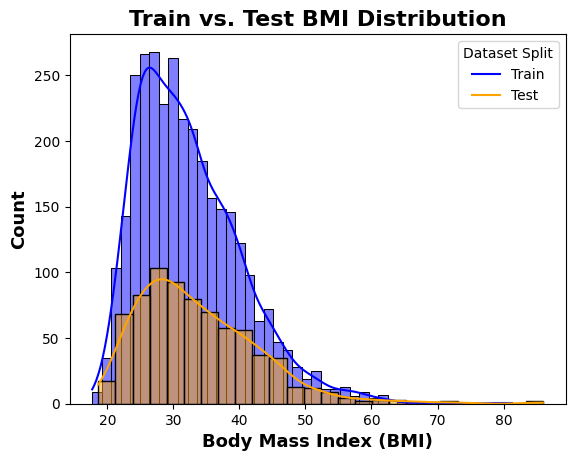

In [20]:
sns.histplot(
    data= df_clean[df_clean['is_training'] == 1], 
    x= 'bmi', 
    color= 'blue', 
    label= 'Train', 
    kde= True
)
sns.histplot(
    data= df_clean[df_clean['is_training'] == 0], 
    x= 'bmi', 
    color= 'orange', 
    label= 'Test', 
    kde= True
)
plt.xlabel('Body Mass Index (BMI)', fontsize= 13, fontweight= 'bold')
plt.ylabel('Count', fontsize= 13, fontweight= 'bold')
plt.title('Train vs. Test BMI Distribution', fontsize= 16, fontweight= 'bold')
plt.legend(title= 'Dataset Split', labels= ['Train', 'Test'])
plt.show()

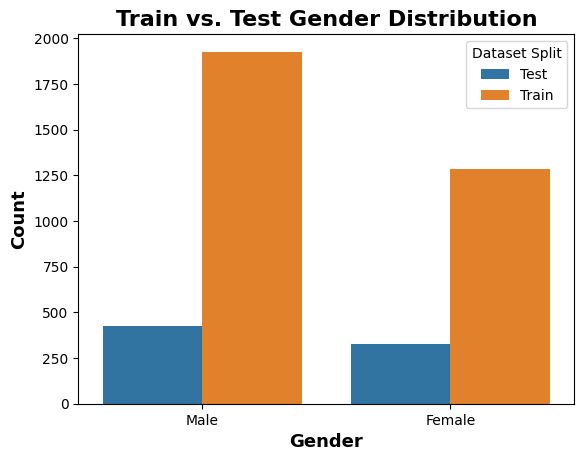

In [21]:
sns.countplot(x= 'gender', hue= 'is_training', data= df_clean)
plt.title('Gender Distribution in Train vs Test')
plt.xlabel('Gender', fontsize= 13, fontweight= 'bold')
plt.ylabel('Count', fontsize= 13, fontweight= 'bold')
plt.title('Train vs. Test Gender Distribution', fontsize= 16, fontweight= 'bold')
plt.legend(title= 'Dataset Split', labels= ['Test', 'Train'])
plt.show()